# Final Project: Wine Quality Data Cleaning

**Author:** Logan Ash
**Date:** 2025-05-13

This notebook focuses on data cleaning steps applied to the Wine Quality dataset. We will document each cleaning action and provide rationale.

# Wine Quality Dataset Analysis (Red & White Wines)

This notebook analyzes and compares the UCI Red and White Wine Quality datasets using summary statistics and simple data exploration.


In [10]:
%pip install jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\logan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Plot style
sns.set(style="whitegrid")


## Load the Red and White Wine Quality Data

We load both datasets directly from the UCI repository and add a 'type' column to each.


In [12]:
# Load data
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red = pd.read_csv(red_url, sep=';')
red['type'] = 'red'
white = pd.read_csv(white_url, sep=';')
white['type'] = 'white'

df = pd.concat([red, white], ignore_index=True)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
display(df.head())


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Data Cleaning

We check for missing values and duplicates.


In [13]:
# Check for missing values and duplicates
missing = df.isnull().sum().sum()
dupes = df.duplicated().sum()
display(Markdown(f"**Missing values:** {missing}"))
display(Markdown(f"**Duplicate rows:** {dupes}"))

# Drop duplicates (if any)
df = df.drop_duplicates()


**Missing values:** 0

**Duplicate rows:** 1177

## Question 1: What are the summary statistics (mean, median, standard deviation, min, max) for each physicochemical property in the wine dataset?


In [14]:
summary_stats = df.describe().T
summary_stats['median'] = df.median(numeric_only=True)
summary_stats = summary_stats[['mean', 'median', 'std', 'min', 'max']]
display(summary_stats.style.background_gradient(axis=0, cmap='Blues'))
display(Markdown(
    f"**Key takeaway:**\n\n"
    f"- Alcohol mean: **{summary_stats.loc['alcohol','mean']:.2f}**\n"
    f"- pH mean: **{summary_stats.loc['ph','mean']:.2f}**\n"
    f"- Quality mean: **{summary_stats.loc['quality','mean']:.2f}**"
))


,mean,median,std,min,max
fixed_acidity,7.215179,7.000000,1.319671,3.800000,15.900000
volatile_acidity,0.344130,0.300000,0.168248,0.080000,1.580000
citric_acid,0.318494,0.310000,0.147157,0.000000,1.660000
residual_sugar,5.048477,2.700000,4.500180,0.600000,65.800000
chlorides,0.056690,0.047000,0.036863,0.009000,0.611000
free_sulfur_dioxide,30.036654,28.000000,17.805045,1.000000,289.000000
total_sulfur_dioxide,114.109023,116.000000,56.774223,6.000000,440.000000
density,0.994535,0.994650,0.002966,0.987110,1.038980
ph,3.224664,3.210000,0.160379,2.720000,4.010000
sulphates,0.533357,0.510000,0.149743,0.220000,2.000000


**Key takeaway:**

- Alcohol mean: **10.55**
- pH mean: **3.22**
- Quality mean: **5.80**

## Question 2: Which chemical properties show the greatest and least variation among the wines?


In [15]:
variation = summary_stats['std'].sort_values(ascending=False)
display(variation.to_frame('std').style.background_gradient(axis=0, cmap='Oranges'))

display(Markdown(
    f"**Most variable:** {variation.index[0]} (std={variation.iloc[0]:.2f})\n\n"
    f"**Least variable:** {variation.index[-1]} (std={variation.iloc[-1]:.4f})"
))


,std
total_sulfur_dioxide,56.774223
free_sulfur_dioxide,17.805045
residual_sugar,4.500180
fixed_acidity,1.319671
alcohol,1.185933
quality,0.879772
volatile_acidity,0.168248
ph,0.160379
sulphates,0.149743
citric_acid,0.147157


**Most variable:** total_sulfur_dioxide (std=56.77)

**Least variable:** density (std=0.0030)

## Question 3: Are there notable differences in chemical properties between red and white wines?


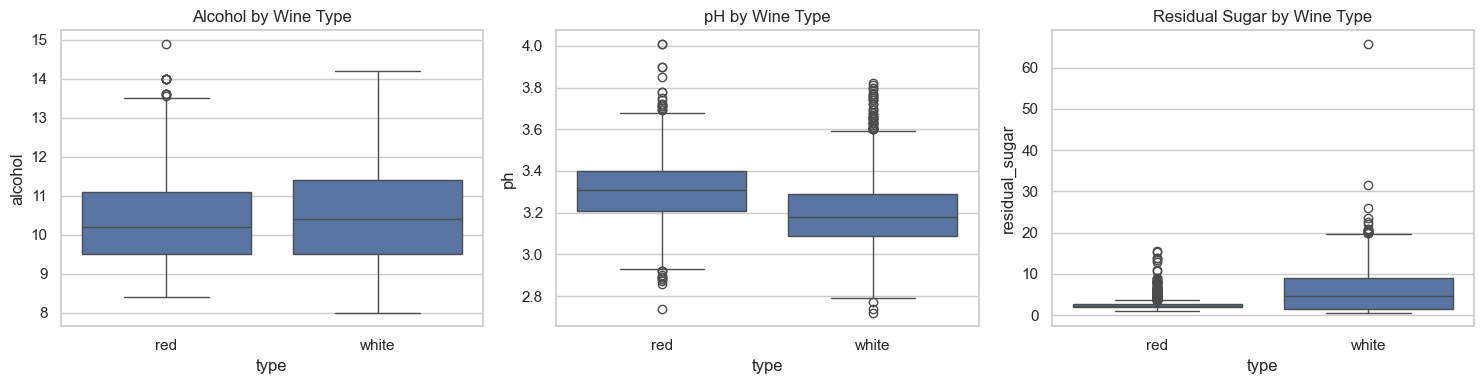

**Key findings:**

- **White wines** have higher average residual sugar and lower alcohol than **red wines**.
- **Red wines** tend to have a slightly lower pH (more acidic) than whites.

In [16]:
grouped = df.groupby('type').agg(['mean', 'std', 'median'])
display(grouped.style.background_gradient(axis=0, cmap='PuBu'))

# Visualize a few key differences
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(x='type', y='alcohol', data=df, ax=axes[0])
axes[0].set_title("Alcohol by Wine Type")
sns.boxplot(x='type', y='ph', data=df, ax=axes[1])
axes[1].set_title("pH by Wine Type")
sns.boxplot(x='type', y='residual_sugar', data=df, ax=axes[2])
axes[2].set_title("Residual Sugar by Wine Type")
plt.tight_layout()
plt.show()

display(Markdown(
    "**Key findings:**\n\n"
    "- **White wines** have higher average residual sugar and lower alcohol than **red wines**.\n"
    "- **Red wines** tend to have a slightly lower pH (more acidic) than whites."
))


## Question 4: What are the most common values (modes) for key properties like pH and alcohol?


**Most common pH:** 3.16

**Most common alcohol:** 9.5%

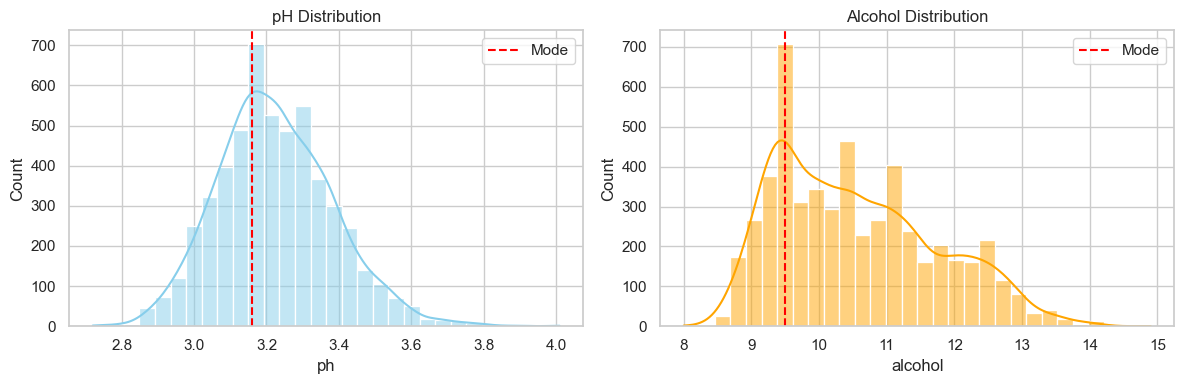

In [17]:
ph_mode = df['ph'].mode()[0]
alcohol_mode = df['alcohol'].mode()[0]
display(Markdown(
    f"**Most common pH:** {ph_mode}\n\n"
    f"**Most common alcohol:** {alcohol_mode}%"
))

# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df['ph'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(ph_mode, color='red', linestyle='--', label='Mode')
axes[0].set_title('pH Distribution')
axes[0].legend()
sns.histplot(df['alcohol'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].axvline(alcohol_mode, color='red', linestyle='--', label='Mode')
axes[1].set_title('Alcohol Distribution')
axes[1].legend()
plt.tight_layout()
plt.show()


## Question 5: How is wine quality distributed in the dataset (e.g., what is the most common quality score), and does it differ by wine type?


**Most common (mode) quality:** 6

**Median quality:** 6.0

C:\Users\logan\AppData\Local\Temp\ipykernel_18884\3731944272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


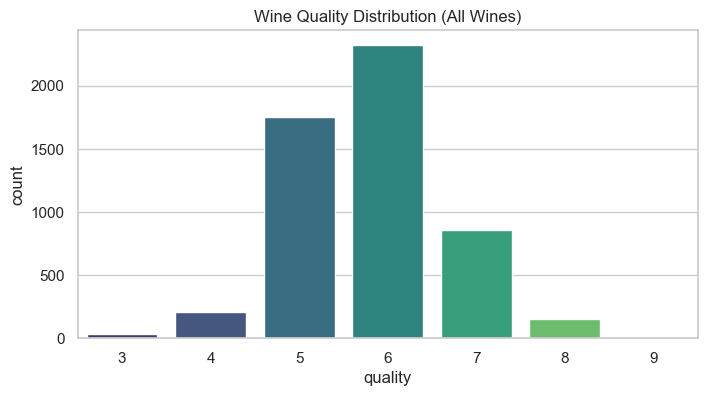

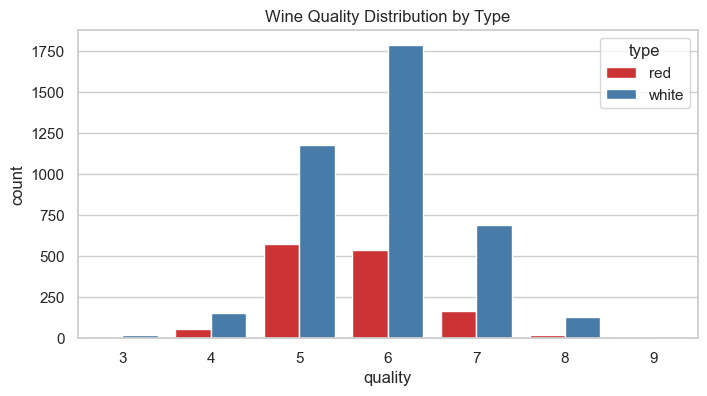

**Key findings:**

- Most wines are rated **6** or **5**.
- Quality distributions are similar, but white wines have a slightly higher median quality.

In [18]:
# Overall
quality_counts = df['quality'].value_counts().sort_index()
quality_mode = df['quality'].mode()[0]
quality_median = df['quality'].median()
display(Markdown(
    f"**Most common (mode) quality:** {quality_mode}\n\n"
    f"**Median quality:** {quality_median}"
))

# Plot overall quality distribution
plt.figure(figsize=(8,4))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Wine Quality Distribution (All Wines)')
plt.show()

# By type
plt.figure(figsize=(8,4))
sns.countplot(x='quality', hue='type', data=df, palette='Set1')
plt.title('Wine Quality Distribution by Type')
plt.show()

display(Markdown(
    "**Key findings:**\n\n"
    "- Most wines are rated **6** or **5**.\n"
    "- Quality distributions are similar, but white wines have a slightly higher median quality."
))


# Summary

- The dataset provides a variety of chemical measurements for both red and white wines.
- Sulfur dioxide and acidity show the most variation among wines.
- There are clear chemical differences between red and white wines.
- Most wines have average quality scores, with typical pH and alcohol values.
- The distribution of quality scores can be compared between red and white wines.

